In [3]:
from utg import create_graph, utils
from orderbike import plot, growth
import json
import os

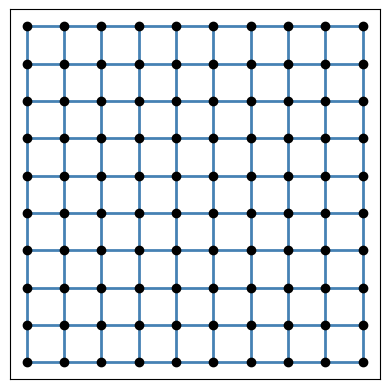

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [4]:
G = create_graph.create_grid_graph(rows=10, cols=10, width=100, diagonal=False)
utils.plot_graph(G)

In [5]:
print(f"Node 0 is {G.nodes[0]}, Node 1 is {G.nodes[1]}, Node 10 is {G.nodes[10]}.")

Node 0 is {'x': 0, 'y': 0}, Node 1 is {'x': 0, 'y': 100}, Node 10 is {'x': 100, 'y': 0}.


You need to add 1 to go up, add 10 to go right !

In [106]:
manual_order = []
# manual_order.append((0, 1))
manual_order.append((1, 2))
manual_order.append((2, 3))
manual_order.append((3, 4))
manual_order.append((4, 5))
manual_order.append((5, 6))
manual_order.append((6, 7))
manual_order.append((7, 8))
manual_order.append((8, 9))
for j in range(9):
    manual_order.append((j * 10, j * 10 + 10))
    for i in range(9):
        manual_order.append((j * 10 + i + 1, j * 10 + i + 11))
        manual_order.append((j * 10 + i + 10, j * 10 + i + 11))

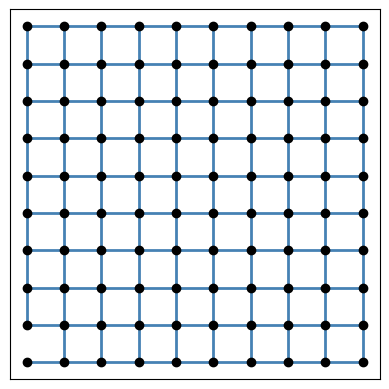

(<Figure size 640x480 with 1 Axes>, <Axes: >)

In [107]:
utils.plot_graph(G.edge_subgraph(manual_order))

In [108]:
len(manual_order)

179

In [109]:
foldername = "../data/processed/ignored_files/utg_grid_trials/manual_additive_connected/second_order"

In [111]:
foldergrowth = foldername + "/growth"
if not os.path.exists(foldergrowth):
    os.makedirs(foldergrowth)

In [112]:
with open(foldername + "/order_growth.json", "w") as f:
    json.dump(manual_order, f)

In [113]:
metrics_dict = growth.compute_metrics(G, manual_order, built=False, buff_size=152)
with open(foldername + "/metrics_growth.json", "w") as f:
    json.dump(metrics_dict, f)

In [114]:
plot.plot_growth(
    G,
    manual_order,
    foldergrowth,
    built=False,
    color_built="firebrick",
    color_added="steelblue",
    color_newest="darkgreen",
    node_size=8,
)

In [115]:
plot.make_growth_video(foldergrowth, foldergrowth + "/growth_video.mp4", fps=3)

In [116]:
foldergrowth_buff = foldername + "/growth_buffer"
if not os.path.exists(foldergrowth_buff):
    os.makedirs(foldergrowth_buff)
plot.plot_growth(
    G,
    manual_order,
    foldergrowth_buff,
    built=False,
    color_built="firebrick",
    color_added="steelblue",
    color_newest="darkgreen",
    node_size=8,
    buffer=True,
    plot_metrics=True,
    growth_cov=metrics_dict["coverage"],
    growth_xx=metrics_dict["xx"],
    growth_dir=metrics_dict["directness"],
    growth_reldir=metrics_dict["relative_directness"],
)

In [117]:
plot.make_growth_video(
    foldergrowth_buff, foldergrowth_buff + "/growth_video.mp4", fps=3
)